### **Librerías**

In [2]:
from sklearn.datasets import load_files   
import openpyxl
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import io
import xlrd
import glob
from pandas import ExcelFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import datetime as dt
from datetime import date, timedelta
import seaborn as sns
from scipy import stats
import calendar
import matplotlib.pyplot as mplt
from pandas import Grouper
import matplotlib.dates as mdates 
import warnings
warnings.filterwarnings("ignore")
from pandas.tseries.offsets import *
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime
import matplotlib.ticker as mtick
from matplotlib import ticker
from matplotlib import*

#### **Lectura y transformaciones básicas de los datos**

In [3]:
data_DA = pd.read_csv("CasosPositivosCOVID19_Colombia.csv")
data_DA

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,...,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte
0,0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,...,2020-02-27T00:00:00.000,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN,NaN
1,1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,...,2020-03-04T00:00:00.000,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN,NaN
2,2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,...,2020-02-29T00:00:00.000,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN,NaN
3,3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,...,2020-03-06T00:00:00.000,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN
4,4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,...,2020-03-08T00:00:00.000,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607933,933,607974,2020-08-28T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,50,M,En estudio,...,Asintomático,2020-08-30T00:00:00.000,NaN,2020-08-30T00:00:00.000,NaN,11,NaN,NaN,NaN,NaN
607934,934,607975,2020-08-29T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,53,F,En estudio,...,Asintomático,2020-08-30T00:00:00.000,NaN,2020-08-30T00:00:00.000,NaN,11,NaN,NaN,NaN,NaN
607935,935,607976,2020-08-29T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,48,M,En estudio,...,Asintomático,2020-08-30T00:00:00.000,NaN,2020-08-30T00:00:00.000,NaN,11,NaN,NaN,NaN,NaN
607936,936,607977,2020-08-29T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,56,M,En estudio,...,Asintomático,2020-08-30T00:00:00.000,NaN,2020-08-30T00:00:00.000,NaN,11,NaN,NaN,NaN,NaN


In [287]:
ciudades_ppales = data_DA.loc[data_DA['ciudad_de_ubicaci_n'].isin(['Medellín','Bogotá D.C.','Cali','Barranquilla','Cartagena de Indias'])]

In [288]:
ciudades_ppales['fecha_reporte_web'] = pd.to_datetime(ciudades_ppales['fecha_reporte_web']).dt.tz_localize(None) 
ciudades_ppales = ciudades_ppales.set_index('fecha_reporte_web')

In [290]:
data_inicio = ciudades_ppales.groupby (['fecha_reporte_web']).id_de_caso.count()
data_inicio = data_inicio.to_frame()
data_inicio = pd.DataFrame(data_inicio)
post_counts = data_inicio['id_de_caso'].resample('D').size()

### **Casos nuevos por día**

Text(0.5, 1.0, 'Casos nuevos por día')

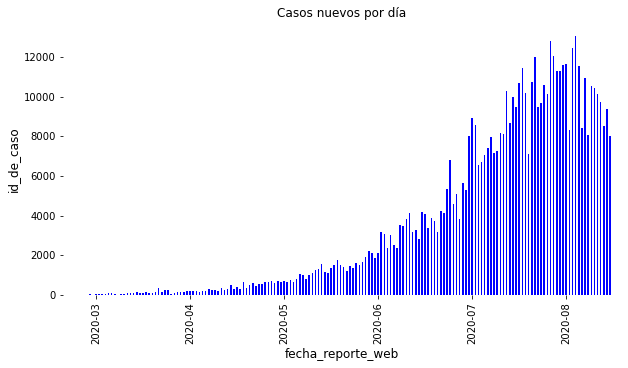

In [292]:
from bokeh.plotting import figure, output_file, show
data_agrupada = data_DA.groupby (['fecha_reporte_web']).id_de_caso.count()
ax = data_agrupada.plot.bar(figsize = (10,5), color = 'blue')

ax.set_xlabel("Fecha",  size=12)
ax.set_ylabel("Casos nuevos por día", size=12)
p = figure(x_axis_type='datetime')

x_labels = post_counts.index

sns.barplot(x_labels, post_counts, color="blue")

tick_positions = np.arange(10, len(x_labels), step=30)

plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y-%m"))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos nuevos por día")


### **Casos confirmados**

In [278]:
casos_confirmados = data_DA['id_de_caso'].count()
print('El total de casos confirmados es: ',casos_confirmados,)

El total de casos confirmados es:  607938


### **Casos recuperados**

In [296]:
count_gral = data_DA[['id_de_caso','atenci_n']]
count_rec = count_gral.loc[count_gral['atenci_n'] == 'Recuperado']
count_rec = pd.DataFrame(count_rec)
count_rec = count_rec['atenci_n'].count()
print('El total de casos recuperados es: ',count_rec,)

El total de casos recuperados es:  450621


In [286]:
print('El porcentaje de recuperados es del:', count_rec/casos_confirmados*100,'%')

El porcentaje de recuperados es del: 74.12285463320273 %


### **Casos fallecidos**

In [295]:
count_fallecidos = count_gral.loc[count_gral['atenci_n'] == 'Fallecido']
count_fallecidos = pd.DataFrame(count_fallecidos)
count_fallecidos = count_fallecidos['atenci_n'].count()
print('El total de casos fallecidos es: ',count_fallecidos,)

El total de casos fallecidos es:  19364


In [297]:
print('El porcentaje de fallecidos es del:', count_fallecidos/casos_confirmados*100,'%')

El porcentaje de fallecidos es del: 3.185193226940905 %


#### **Conteo por estado**

In [256]:
conteo = data_DA.groupby('atenci_n').count()
conteo

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,edad,sexo,tipo,estado,...,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte
atenci_n,,,,,,,,,,,,,,,,,,,,,
Casa,114376,114376,114376,114376,114376,114376,114376,114376,114376,114376,...,114376,114373,0,114376,0,114376,0,1368,274,0
Fallecido,19364,19364,19364,19364,19364,19364,19364,19364,19364,19364,...,19364,19160,0,19364,0,19364,23,11675,288,19364
Hospital,20417,20417,20417,20417,20417,20417,20417,20417,20417,20417,...,20417,20357,0,20417,0,20417,4,7761,265,0
Hospital UCI,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,...,1908,1897,0,1908,0,1908,0,1067,31,0
Recuperado,450621,450621,450621,450621,450621,450621,450621,450621,450621,450490,...,450621,447086,450621,450621,450621,450621,935,258779,7251,129
hospital,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,0,0,0,0


In [223]:
conteo_estado = conteo['Unnamed: 0']
conteo_estado = pd.DataFrame(conteo_estado)

In [240]:
conteo_estado = conteo_estado.sort_values(by='Unnamed: 0', ascending=False)
conteo_estado

,Unnamed: 0
atenci_n,
Recuperado,450621
Casa,114376
Hospital,20417
Fallecido,19364
Hospital UCI,1908
hospital,1


En el conteo por estado se observa el comportamiento del total de casos positivos de COVID-19 en Colombia.

Con el fin de tener un panorama detallado de este comportamiento, se evalúan las cinco principales ciudades de Colombia.

### **Ciudades principales**

In [43]:
agr_ciudad = ciudades_ppales.groupby (['ciudad_de_ubicaci_n']).id_de_caso.count()
agr_ciudad = agr_ciudad.to_frame()
agr_ciudad = pd.DataFrame(agr_ciudad)

In [44]:
agr_ciudad.columns = ['Cantidad']

In [59]:
agr_ciudad.sort_values("Cantidad", axis = 0, ascending = True, 
                 inplace = True)
agr_ciudad

,Cantidad
ciudad_de_ubicaci_n,
Cartagena de Indias,20359
Barranquilla,36069
Cali,36555
Medellín,46361
Bogotá D.C.,209250


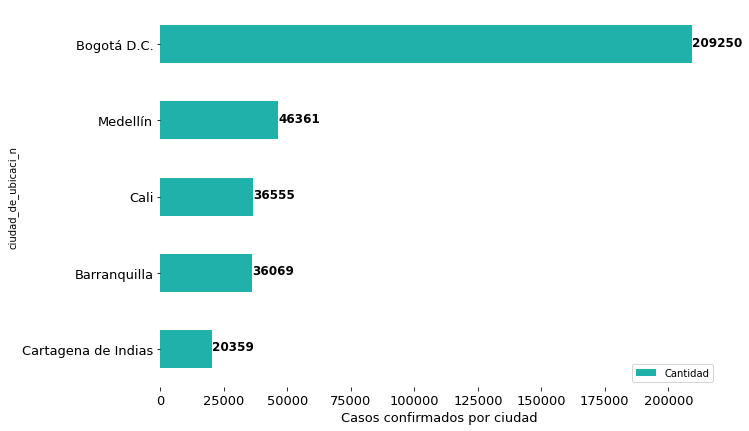

In [220]:
y_label = agr_ciudad[['Cantidad']]
ax = agr_ciudad.plot(kind='barh', figsize=(10,7),
                                        color="lightseagreen", 
                                         fontsize=13);

ax.set_xlabel("Casos confirmados por ciudad",  size=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center', color='black', fontweight='bold', fontsize=12)

Se identifica que Bogotá D.C., Medellín, Cali, Barranquilla y Cartagena de Indias son las ciudades con mayor número de casos por COVID-19, por lo cual, el análisis descriptivo se enfocará para estas cinco ciudades principales de Colombia.

### **Casos confirmados por edad**

Text(0.5, 1.0, 'Casos confirmados por edad')

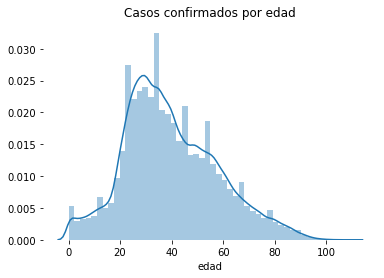

In [138]:
ax = sns.distplot(data_DA['edad'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos confirmados por edad")

En las cinco ciudades principales de Colombia, se logra observar un incremento de los casos confirmados en un rango de edad entre los 30 y 40 años, y siendo menor en el rango de 70 años en adelante.

### **Fallecidos por edad**

In [140]:
fallecidos_edad = data_DA.loc[data_DA['atenci_n'].isin(['Fallecido'])] 

Text(0.5, 1.0, 'Fallecidos por edad')

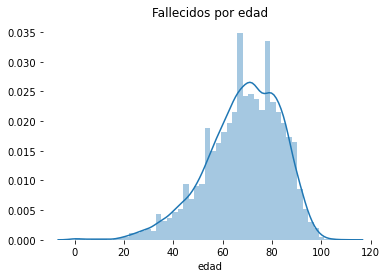

In [141]:
ax = sns.distplot(fallecidos_edad['edad'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Fallecidos por edad")

Si bien se observaba en los casos confirmados por edad un incremento importante en los rango de edad entre 30 y 40 años, en los casos de fallecidos a causa del COVID-19 se observa que el rango de edad de las personas que mueren a causa de la enfermedad se encuentran en el rango de edad entre 70 y 80 años, logrando evidenciar que ésta es la población más vulnerable debido a los antecedentes de salud que puedan presentar y cuentan con una alta probabilidad de agravarse con el virus.

#### **Casos confirmados por sexo**

In [165]:
data_DA['sexo'] = data_DA['sexo'].str.replace('f','F')
data_DA['sexo'] = data_DA['sexo'].str.replace('m','M')

In [173]:
sexo_F = data_DA[data_DA['sexo'] == 'F']
sexo_M = data_DA[data_DA['sexo'] == 'M']

In [174]:
data_sexo_confirmados= data_DA.groupby(["sexo"])["id_de_caso"].count()
data_sexo_confirmados = pd.DataFrame(data_sexo_confirmados)

In [178]:
data_sex_conf = data_sexo_confirmados.T
data_sex_conf = pd.DataFrame(data_sex_conf)

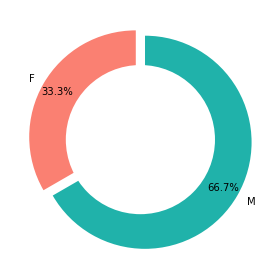

In [216]:
import matplotlib.pyplot as plt
labels = ['F', 'M']
sizes = [15, 30]
colors = ['salmon','lightseagreen']
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Dentro del grupo poblacional en las cinco principales ciudades de Colombia, se tiene que el mayor porcentaje de casos confirmados corresponden a hombres y en menor proporción corresponde a mujeres.